<a href="https://colab.research.google.com/github/daregioia/Consumer-Segmentation-Using-PCA/blob/main/Consumer_Segmentation_Using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
1
```



In [ ]:
import pandas as pd

df = pd.read_csv('assg1.csv')

# Display the first few rows of the data and the column names
print(df.head())
print(df.columns)

# Set the display option to show all columns and summarize the data
pd.set_option('display.max_columns', None)
summary = df.describe()
print(summary)


   Resp  X1  X2  X3  X4  X5
0     1   6   0   8   4   4
1     2   4   9   2   8   9
2     3   2   8   2   6   9
3     4   5   7   3   9   6
4     5   3   8   3   9   6
Index(['Resp', 'X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')
            Resp         X1         X2         X3         X4         X5
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000
mean   15.500000   4.400000   5.133333   3.666667   5.400000   4.533333
std     8.803408   2.943139   3.059562   2.745948   2.907778   2.849481
min     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000
25%     8.250000   2.000000   2.500000   2.000000   2.500000   2.000000
50%    15.500000   5.000000   6.000000   3.000000   6.000000   4.000000
75%    22.750000   7.000000   7.750000   5.750000   8.000000   6.000000
max    30.000000   9.000000   9.000000   9.000000   9.000000   9.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude the respondents column before scaling (it's the first column)
columns_to_scale = df.columns[1:]  # Skip the first column
df_scaled = df.copy()

# Apply scaling to the selected columns
scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Summarize the scaled data with descriptive statistics
scaled_summary = df_scaled[columns_to_scale].describe()

# Print the summary of the scaled data
print("Summary of Scaled Data (Excluding Respondents Column):")
print(scaled_summary)

Summary of Scaled Data (Excluding Respondents Column):
                 X1            X2            X3            X4            X5
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01
mean  -1.628327e-16 -1.221245e-16  4.440892e-17 -8.511710e-17  4.440892e-17
std    1.017095e+00  1.017095e+00  1.017095e+00  1.017095e+00  1.017095e+00
min   -1.520560e+00 -1.706482e+00 -1.358128e+00 -1.888836e+00 -1.618131e+00
25%   -8.293962e-01 -8.754034e-01 -6.173310e-01 -1.014375e+00 -9.042494e-01
50%    2.073491e-01  2.881074e-01 -2.469324e-01  2.098706e-01 -1.903683e-01
75%    8.985126e-01  8.698628e-01  7.716637e-01  9.094394e-01  5.235128e-01
max    1.589676e+00  1.285402e+00  1.975459e+00  1.259224e+00  1.594335e+00


2

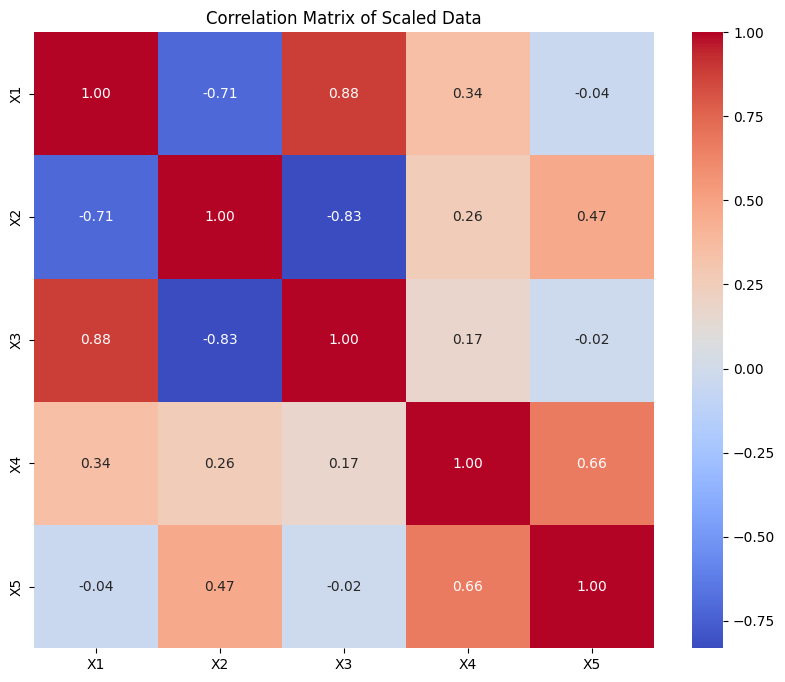

Correlation Matrix:
          X1        X2        X3        X4        X5
X1  1.000000 -0.710739  0.878954  0.343297 -0.038650
X2 -0.710739  1.000000 -0.831827  0.257365  0.470151
X3  0.878954 -0.831827  1.000000  0.172746 -0.020566
X4  0.343297  0.257365  0.172746  1.000000  0.664214
X5 -0.038650  0.470151 -0.020566  0.664214  1.000000

Explanation of the correlations:
Strong negative correlation between X1 and X2 (r = -0.71).
Strong positive correlation between X1 and X3 (r = 0.88).
Moderate or weak correlation between X1 and X4 (r = 0.34).
Moderate or weak correlation between X1 and X5 (r = -0.04).
Strong negative correlation between X2 and X1 (r = -0.71).
Strong negative correlation between X2 and X3 (r = -0.83).
Moderate or weak correlation between X2 and X4 (r = 0.26).
Moderate or weak correlation between X2 and X5 (r = 0.47).
Strong positive correlation between X3 and X1 (r = 0.88).
Strong negative correlation between X3 and X2 (r = -0.83).
Moderate or weak correlation between X3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the scaled data (excluding respondents column)
correlation_matrix = df_scaled[columns_to_scale].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Scaled Data")
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Text explanation based on the correlations
print("\nExplanation of the correlations:")
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx:  # Avoid self-correlations
            correlation_value = correlation_matrix.loc[idx, col]
            if correlation_value > 0.5:
                print(f"Strong positive correlation between {col} and {idx} (r = {correlation_value:.2f}).")
            elif correlation_value < -0.5:
                print(f"Strong negative correlation between {col} and {idx} (r = {correlation_value:.2f}).")
            elif -0.5 <= correlation_value <= 0.5:
                print(f"Moderate or weak correlation between {col} and {idx} (r = {correlation_value:.2f}).")



**Positive correlations** are found when the correlation value (r) falls between 0 and 1. Correlations of a magnitude greater than 0.5 are considered "**strong**", while correlations falling between 0 and 0.5 are called "**moderate**" or "weak" positive correlations.

Factors which showcase a correlation value very close to 0 are virtually uncorrelated, with r=0 representing uncorrelation.

The same relation holds specularly with the **negative** values, falling within 0 and -1: negative correrlations between 0 and -0.5 are considered "**moderate**" or "weak", while correlation values smaller than -0.5 are considered "**strong**" negative correlations.


> **Inferences** from the exploratory analysis:

POSITIVE CORRELATIONS:
*   **X1 and X3** hold the **strongest positive correlation** of all pairs of features (0.88), indicating that one positively reinforces the other. We can therefore safely assume that those shoppers who wouldn't go back to a store where they were treated with disrespect, also greatly appreciate a salesperson who is willing to spend time answering their questions.
*  **X4 and X5** also hold a somewhat strong positive correlation (0.66), which indicates that who care little about fancy displays in department stores, tends not to find discount stores much more of a bargain than department ones.

UNCORRELATED FACTORS:
*   **X3 and X5** are almost **perfectly uncorrelated** (-0.02), indicating that one feeling does not usually affect the other. We can therefore safely assume that shoppers appreciating a salesperson who is willing to spend time answering their questions do not necessarily find discount stores much more of a bargain compared to department stores.
*  **X1 and X5** are also almost perfectly uncorrelated (-0.04). Therefore, shoppers not going back to a store that treated them with disrespect do not necessarily find discount stores much more a bargain than department ones. One belief does not affect the other in any way.

NEGATIVE CORRELATIONS:
* **X2 and X3** are the factors showcasing the **strongest negative correlation** among all pairs (-0.83). This indicates that respondents valuing one of the two features usually tend to dislike the other. We can therefore reasonably assume that shoppers who have a lot of questions when they shop and appreciate a salesperson who spends a lot of time answering their questions, tend not to findsalespeople who fawn over them irritating, and viceversa.
* **X2 and X1** also showcase a strong negative correlation (-0.71). Therefore, people who'd never go back to a store that treated them with disrespect are expected not to find salespeople who fawn over them irritating.  



3

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA on the scaled data (excluding respondents column)
pca = PCA()
pca.fit(df_scaled[columns_to_scale])

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the PCA components (relationship between factors and original attributes)
pca_components = pd.DataFrame(pca.components_, columns=columns_to_scale)

# Create a summary of the PCA results
pca_summary = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "Explained Variance Ratio": explained_variance_ratio,
    "Cumulative Variance Ratio": explained_variance_ratio.cumsum()
})

# Print the PCA summary
print("PCA Summary:")
print(pca_summary)

# Print the PCA components matrix
print("\nPCA Components (Relationship between factors and original attributes):")
print(pca_components)


PCA Summary:
  Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                 PC1                  0.534317                   0.534317
1                 PC2                  0.370443                   0.904760
2                 PC3                  0.068393                   0.973153
3                 PC4                  0.018728                   0.991881
4                 PC5                  0.008119                   1.000000

PCA Components (Relationship between factors and original attributes):
         X1        X2        X3        X4        X5
0  0.554917 -0.570631  0.579641  0.016985 -0.173709
1  0.232489  0.211772  0.156752  0.685978  0.637153
2 -0.279564 -0.183290  0.310604 -0.561098  0.690610
3  0.723423  0.462164 -0.186671 -0.461129  0.124810
4 -0.191098  0.618338  0.712828 -0.040926 -0.267097


4

In [ ]:
# Generate the equations for the principal components
for i, component in enumerate(pca.components_):
    equation = " + ".join(
        [f"({round(weight, 3)} * {feature})" for weight, feature in zip(component, columns_to_scale)]
    )
    print(f"PC{i+1} = {equation}")


PC1 = (0.555 * X1) + (-0.571 * X2) + (0.58 * X3) + (0.017 * X4) + (-0.174 * X5)
PC2 = (0.232 * X1) + (0.212 * X2) + (0.157 * X3) + (0.686 * X4) + (0.637 * X5)
PC3 = (-0.28 * X1) + (-0.183 * X2) + (0.311 * X3) + (-0.561 * X4) + (0.691 * X5)
PC4 = (0.723 * X1) + (0.462 * X2) + (-0.187 * X3) + (-0.461 * X4) + (0.125 * X5)
PC5 = (-0.191 * X1) + (0.618 * X2) + (0.713 * X3) + (-0.041 * X4) + (-0.267 * X5)


5

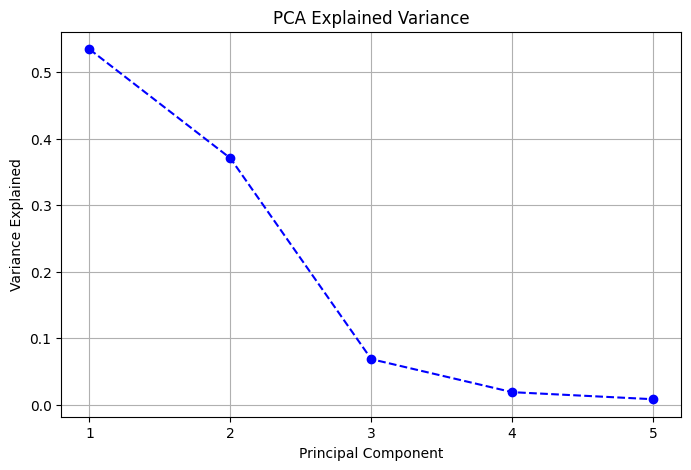

In [ ]:
import matplotlib.pyplot as plt

# Scree plot for PCA explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()



In [ ]:
# Calculate the cumulative variance captured by the first two PCs
variance_pc1 = explained_variance_ratio[0]  # Variance explained by PC1
variance_pc2 = explained_variance_ratio[1]  # Variance explained by PC2
variance_pc3 = explained_variance_ratio[2]
cumulative_variance = variance_pc1 + variance_pc2
cumultive_variance_3 = variance_pc1 + variance_pc2 + variance_pc3

# Print the results
print(f"Variance captured by PC1: {variance_pc1:.2%}")
print(f"Variance captured by PC2: {variance_pc2:.2%}")
print(f"Cumulative variance captured by the first two PCs: {cumulative_variance:.2%}")
print (f"\nVariance captured by PC3: {variance_pc3:.2%}")
print(f"Cumulative variance captured by the first three PCs: {cumultive_variance_3:.2%}")


Variance captured by PC1: 53.43%
Variance captured by PC2: 37.04%
Cumulative variance captured by the first two PCs: 90.48%

Variance captured by PC3: 6.84%
Cumulative variance captured by the first three PCs: 97.32%


PRINCIPAL COMPONENTS RETENTION:

It is reasonable to retain the **first two principal components** (PC1 and PC2) because they collectively capture and **explain over 90% of the variance in the respondents' data**. This represents a good enough estimate to correctly illustrate the overall variance of the survey's responses.
I have decided not to retain the first 3 components because **the third one** (PC3) **would only add a marginal increase in variance explained**  (roughly 7%) compared to the first two, which explain about 50% and 40% of the variance respectively.

6




In [ ]:
# Display PCA Component Loadings for clarity
print("PCA Component Loadings Matrix:")
print(pca_components)

# Interpret PC1 and PC2 based on their loadings
print("\nInterpretation of Principal Components:")
for i, component in enumerate(pca.components_[:2]):  # Focus only on PC1 and PC2
    # Sort features by absolute value of their loadings for clearer interpretation
    sorted_features = sorted(
        zip(columns_to_scale, component),
        key=lambda x: abs(x[1]),
        reverse=True
    )
    print(f"\nPC{i+1} is influenced by:")
    for feature, loading in sorted_features:
        print(f"  - {feature} (loading: {loading:.3f})")

    # Provide an intuitive name suggestion based on dominant features
    if i == 0:
        # Example: PC1 might represent "Customer Service Importance"
        print(f"Suggested Name for PC{i+1}: 'Customer Service Sensitivity'\n"
              f"(Dominated by features with high positive/negative loading such as {sorted_features[0][0]} and {sorted_features[1][0]})")
    elif i == 1:
        # Example: PC2 might represent "Value Sensitivity"
        print(f"Suggested Name for PC{i+1}: 'Fancy displays vs. Store Preference'\n"
              f"(Dominated by features with high positive/negative loading such as {sorted_features[0][0]} and {sorted_features[1][0]})")



PCA Component Loadings Matrix:
         X1        X2        X3        X4        X5
0  0.554917 -0.570631  0.579641  0.016985 -0.173709
1  0.232489  0.211772  0.156752  0.685978  0.637153
2 -0.279564 -0.183290  0.310604 -0.561098  0.690610
3  0.723423  0.462164 -0.186671 -0.461129  0.124810
4 -0.191098  0.618338  0.712828 -0.040926 -0.267097

Interpretation of Principal Components:

PC1 is influenced by:
  - X3 (loading: 0.580)
  - X2 (loading: -0.571)
  - X1 (loading: 0.555)
  - X5 (loading: -0.174)
  - X4 (loading: 0.017)
Suggested Name for PC1: 'Customer Service Sensitivity'
(Dominated by features with high positive/negative loading such as X3 and X2)

PC2 is influenced by:
  - X4 (loading: 0.686)
  - X5 (loading: 0.637)
  - X1 (loading: 0.232)
  - X2 (loading: 0.212)
  - X3 (loading: 0.157)
Suggested Name for PC2: 'Fancy displays vs. Store Preference'
(Dominated by features with high positive/negative loading such as X4 and X5)


PRINCIPAL COMPONENTS INTERPRETATION and EXPLANATION:

**PC1**: It is mostly influenced **positively** by **X3** (positive factor loading of 0.58), **negatively** by **X2** (negative factor loading of -0.571), and **positively** by **X1** (positive factor loading amounting 0.55). *Pairwise correlations indeed show that factors X1 and X3 have the strongest positive correlation of all factors, while both respectively hold the strongest negative correlations with X2*. This principal component therefore captures positively the expectation of being treated with respect in a store (X1) and the appreciation for salespeople willing to spend time answering questions (X3), against finding excessively praising salespeople irritating (X2). It therefore refers to customer service sensitivity and can be named "**Care for respectful and attentive customer service**", where a high position along this dimension represents stronger care for attentive and respectful salespeople willing to spend time answering questions, who in turn are not found irritating when being praising, and viceversa.

**PC2**: It is largely **positively** explained by factors **X4** and **X5**, with respective positive loadings of 0.69 and 0.64. *The table of correlations shows in fact thet X4 and X5 manifest the second strongest positive correlation among the pairs of factors*. This dimension therefore captures predominantly the disinterest in fancy displays in department stores (X4) and the extent to which discount stores are found much more of a bargain than department ones (X5). It therefore captures store preferences and can be therefore named "**Interest for value and practicality in-store**", where a high position on dimension PC2 represents clients prioritizing bargains (discounts over department stores) and less attracted or influenced by superficial or aesthetic factors like fancy displays in department stores.

7

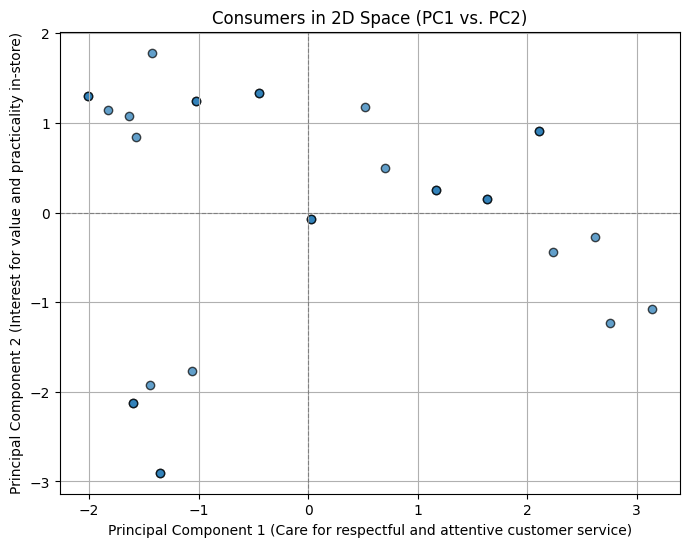

In [ ]:
# Project the data onto the first two principal components
pca_transformed = pca.transform(df_scaled[columns_to_scale])

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_transformed, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
pca_df = pca_df.iloc[:, :2]  # Focus only on the first two principal components

# Plot the consumers in the 2D space of PC1 and PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7, edgecolor='k')
plt.title("Consumers in 2D Space (PC1 vs. PC2)")
plt.xlabel("Principal Component 1 (Care for respectful and attentive customer service)")
plt.ylabel("Principal Component 2 (Interest for value and practicality in-store)")
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.show()


8. Roughly I see **3 clusters**. One is positioned on the top left corner of the plot, one at the bottom left corner, and the remaining dots seem to aggregate on the right middle-top part of the graph. To be sure, I will run a clustering analysis (with the K-means method learned last trimester) with the help of AI, in order to make sure how to correctly perform the clustering for segmenting the respondents.

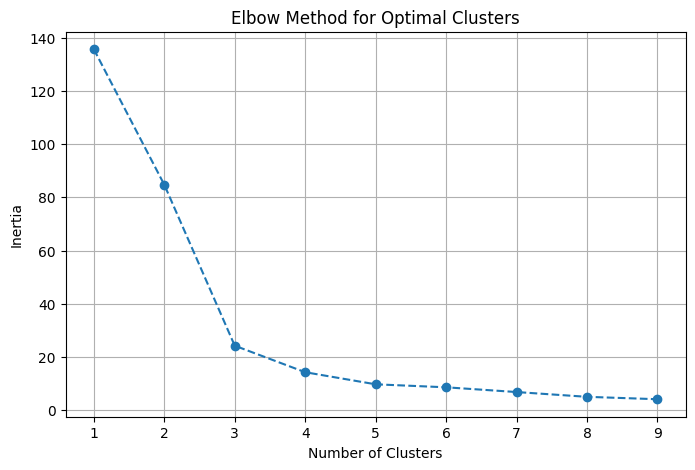

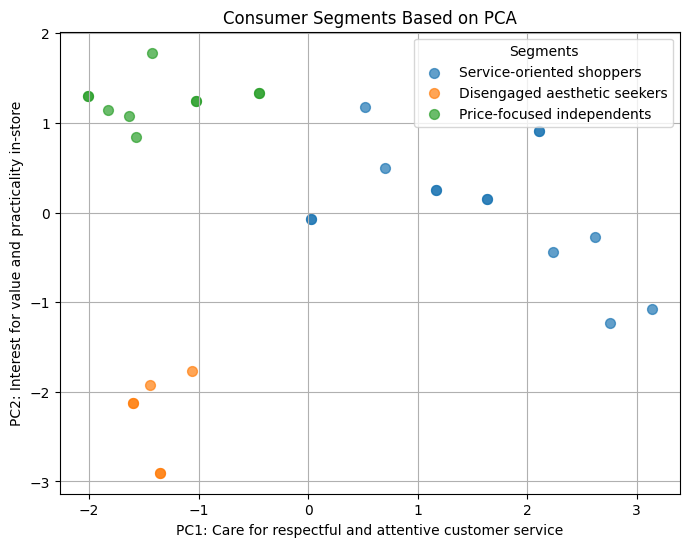

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Transform the data into the PCA space (using the first two components)
pca_transformed = pca.transform(df_scaled[columns_to_scale])[:, :2]  # Select PC1 and PC2

# Step 1: Use the Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 10)  # Try 1 to 9 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Step 2: Apply K-Means with the optimal number of clusters (e.g., 3 based on the elbow)
optimal_k = 3  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_transformed)


cluster_names = {
    0: "Service-oriented shoppers",
    1: "Disengaged aesthetic seekers",
    2: "Price-focused independents"
}

plt.figure(figsize=(8, 6))
for cluster_id, cluster_name in cluster_names.items():
    cluster_data = pca_transformed[clusters == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_name, s=50, alpha=0.7)

plt.title('Consumer Segments Based on PCA')
plt.xlabel('PC1: Care for respectful and attentive customer service')
plt.ylabel('PC2: Interest for value and practicality in-store')
plt.legend(title="Segments")
plt.grid()
plt.show()



9 (The name of the segments were added to the plot ultimately)

SEGMENT 1 (ORANGE) - **Disengaged aesthetic seekers**: they are positioned in the lowest ends of both PC1 and PC2, where the values of both dimensions are negative.
Negative values for PC1 make this the cluster of clients who:
* do not have many questions when they shop, and therefore do not appreciate a salesperson that spends time answering their questions
* would go back to a store that treated them with disrespect
* find salespeople who fawn over them irritating and just expect them to be courteous.

Negative values for PC2 make up for people who:
* do care about the fancy displays in department stores
* don't find discount stores much more of a bargain than department stores

They can be therefore named "Disengaged aesthetic seekers" because they don't seek personalized attention or extensive assistance from salespeople, they aren't particularly drawn to discounts, and do appreciate aesthetic elements like fancy displays, but overall exhibit a lack of strong engagement with shopping experiences.

--------

SEGMENT 2 (GREEN) - **Price-focused independents**: they are positioned on the lowest end of PC1 but on the highest end of PC2. Their positioning showcases negative values along the first dimension and the strongest positive values of all clusters among the second dimension.
Negative values on PC1 indicate that clients belonging to this cluster:
* do not have many questions when they shop, and therefore do not appreciate a salesperson that spends time answering their questions
* would go back to a store that treated them with disrespect
* find salespeople who fawn over them irritating and just expect them to be courteous.

Strong positive values on PC2 indicate that these customers:
* don't care about the fancy displays in department stores
* find discount stores much more of a bargain than department stores.

This segment can therefore be named "Price-focused independents" reflecting their focus on bargains and discounts, along with their preference for independence in shopping, avoiding unnecessary interactions with salespeople and disregarding aesthetic elements like fancy displays.

---

SEGMENT 0 (BLUE) - **Service-oriented shoppers**: This segment is less concentrated compared to the other two, extending from the origin of the two dimensions to high positive values on PC1, as well as slightly negative to positive values on PC2.
Positioning on the highest positive values of all clusters for PC1 means that these customers:
* do have many questions when they shop, and therefore do appreciate a salesperson that spends time answering their questions
* wouldn't go back to a store that treated them with disrespect
* do not find salespeople who fawn over them irritating and just expect them to be courteous.

Spanning from slightly negative to slightly positive values on PC2 means that these customers are split on the importance they attribute to discounts (store-type) and fancy displays. we can therefore assume that on average they are indifferent to the presence of fancy displays in department stores and do not necessarily find discount stores much more a barain than department stores. It therefore comprehends moderately differing individuals.

This segment can be therefore referred to as "Service-oriented shoppers", reflecting their preference for respectful and attentive customer service while acknowledging their moderate and mixed attitudes toward discounts and store displays.

10

In [ ]:
# Assign clusters to the original data
df_scaled['Segment'] = clusters

# Analyze the size of each segment
segment_sizes = df_scaled['Segment'].value_counts(normalize=True) * 100

# Summarize segment characteristics based on means of the original attributes
segment_characteristics = df_scaled.groupby('Segment')[columns_to_scale].mean()

# Identify the most profitable segment based on characteristics
print("Segment Sizes (as % of total):")
print(segment_sizes)

print("\nSegment Characteristics (mean values of original attributes):")
print(segment_characteristics)


Segment Sizes (as % of total):
Segment
0    46.666667
2    33.333333
1    20.000000
Name: proportion, dtype: float64

Segment Characteristics (mean values of original attributes):
               X1        X2        X3        X4        X5
Segment                                                  
0        0.947881 -0.851658  0.864263  0.109932 -0.266856
1       -1.290172  0.288107 -1.234662 -1.539051 -1.261190
2       -0.552931  1.019457 -0.469172  0.769526  1.130312



Each customer was assigned to the clusters (segments) identified in answer 8. This information helped analyze each cluster's characteristics, from the analysis of their original features to identifying each segment's size relative to the total sample size. Based on segment characteristics, it is possible to identify metrics and preferences that can determine each specific segment's potential profitability.

Profitability is achieved by lowering costs and/or increasing revenues.
Costs might be lower when the sales-service is minimized, standardized (and/or digitalized), while revenues are higher when exceptional and customized service levels ensure higher willingness to pay by the customers (premium pricing), and/or repetead purchases, thus increasing the sales volume due to the loyalty to the service or quality.

---
Profitability assessment of the segments:



SEGMENT 0 - **service-oriented shoppers** (47% of the sample):

* These shoppers are likely loyal and willing to pay premium prices for attentive service.
* They may generate higher revenues through repeat purchases if the service quality is consistently maintained.
* Costs might be higher due to the need for skilled and courteous staff, but the increased customer lifetime value can offset these costs
* The size of this segment is the biggest among all identified clusters

SEGMENT 1 - **Disengaged aestheic seekers** (20% of the sample):

* This segment may not contribute significantly to profitability due to low loyalty and engagement.
* They are likely sporadic shoppers who value aesthetic aspects but are less influenced by service quality or value.
* It may not be worth investing heavily in targeting this group as their spending behavior is less predictable.

SEGMENT 2 - **price-focused independents** (33% of the sample):

* They are highly cost-sensitive but represent a substantial segment of price-conscious shoppers.
* While margins per transaction might be lower, the large volume of purchases can drive overall profitability.
* This group can be efficiently served by focusing on operational efficiency and consistent low prices without heavy investment in aesthetics or premium services.

From these insights, I would target either segment 0 or 2:

* segment 0 (service-oriented shoppers) can provide high margins by willing to pay premium prices for higher-end in-store service levels -> DIFFERENTIATION STRATEGY;
* segment 2 (price-focused independents) can account for a high sales-volume with lower-margin sales. This targeting strategy can work if enough cost-efficiency is achieved by cutting down all frills and reducing service levels to the bare minimum -> COST-EFFICIENCY STRATEGY.
